In [1]:
from src.solvers import BaldoML
from src.data_structures.features import *
from src.data_structures import Instance,Solution
from pathlib import Path

In [2]:
features: list[ItemBatchFeature] = [
            ProfitOverBudget(),
            LowerCostOverBudget(),
            UpperCostOverBudget(),
            IsInContSol(),
            IsInOptSol(),
            CountPSynergiesOverNItems(),
            CountPSynergiesOverBudget(),
            GammaOverNItems(),
            SumOfSynergiesByItemOverMaxSinergyProfit(),
            Noise()
            ]
key= lambda x: x.n_items
validation_data_folder = Path("validation_data")
evaluation_instances = list(iter(map(Instance.from_file,validation_data_folder.iterdir())))
evaluation_instances.sort(key=key)

In [3]:
import pickle
model_file = "/home/mixto/repositories/PRKP/src/solvers/BaldoML/model_data/finalized_model_rTrees.sav"
n_features = 6
fixed_percentage = 0.85
clf = pickle.load(open(model_file, 'rb'))
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=30,
                                        min_samples_split=10,
                                        n_estimators=50))])


In [4]:
solutions: list[Solution] = []
for instance in evaluation_instances:
    print(f"{instance.n_items}")
    solutions.append(BaldoML.solve(instance))

100
Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-21
Set parameter TimeLimit to value 600


100
Set parameter TimeLimit to value 600
100
Set parameter TimeLimit to value 600
100
Set parameter TimeLimit to value 600
150
Set parameter TimeLimit to value 600
168
Set parameter TimeLimit to value 600
187
Set parameter TimeLimit to value 600
200
Set parameter TimeLimit to value 600
200
Set parameter TimeLimit to value 600
200
Set parameter TimeLimit to value 600
206
Set parameter TimeLimit to value 600
224
Set parameter TimeLimit to value 600
243
Set parameter TimeLimit to value 600
262
Set parameter TimeLimit to value 600
280
Set parameter TimeLimit to value 600
299
Set parameter TimeLimit to value 600
300
Set parameter TimeLimit to value 600
300
Set parameter TimeLimit to value 600
300
Set parameter TimeLimit to value 600
318
Set parameter TimeLimit to value 600
336
Set parameter TimeLimit to value 600
355
Set parameter TimeLimit to value 600
374
Set parameter TimeLimit to value 600
392
Set parameter TimeLimit to value 600
400
Set parameter TimeLimit to value 600
400
Set paramete

In [8]:
from matplotlib import pyplot as plt
ofs = [sol.o for sol in solutions]
times = [sol.time for sol in solutions]

(array([64., 22.,  8., 11.,  5.,  8.,  4.,  6.,  5.,  2.]),
 array([0.08110738, 0.91165504, 1.74220271, 2.57275038, 3.40329804,
        4.23384571, 5.06439338, 5.89494104, 6.72548871, 7.55603638,
        8.38658404]),
 <BarContainer object of 10 artists>)

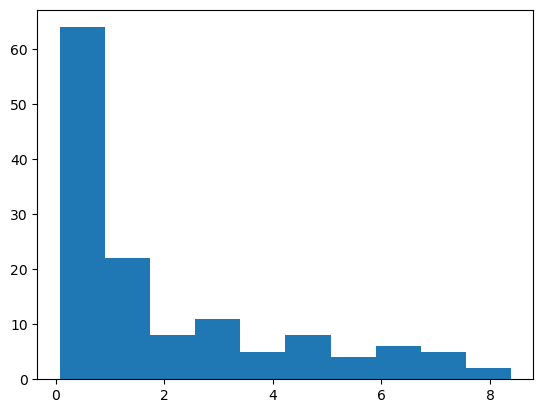

In [10]:
plt.hist(times)